In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# to store each snapshot into a csv row
data = []
with open('/content/Polymer.data') as f:
  lines = f.readlines()
i = 0;
while i<len(lines):
  for j in range(100):
    if i+9+j >=len(lines):
      last = i+9+j
      break
    data.append(lines[i+9+j])
    # print(i+9+j)
  # data.append(lines[i+9:i+9+100])
  i = i+100+9
  # print(i)

In [ ]:
# # to store each snapshot into a csv row
# data = []
# with open('/content/Polymer.data') as f:
#   lines = f.readlines()
# i = 0;
# while i<len(lines):
#   s = lines[i+9:i+9+100]
#   for i in range(0,101):
#     l = s[0].split()
#     data.append(l)
#   data.append(lines[i+9:i+9+100])
#     # print(i+9+j)
#   # data.append(lines[i+9:i+9+100])
#   i = i+100+9

In [ ]:
# s = lines[0+9:0+9+100]
# s = [el.split() for el in s]
# s = [list(map(float ,el)) for el in s]

data = [el.split() for el in data]
data = [list(map(float ,el)) for el in data]

In [ ]:
# data = np.array(data)
# data.shape

In [ ]:
features = []
for i in range(len(data)):
  features.append(data[i][3:])

In [ ]:
features_arr = np.array(features)
features_arr.shape

(1206000, 6)

In [ ]:
features_new = []
i = 0
while i < len(features):
  features_new.append(np.mean(features_arr[i:i+100], axis=0))
  i = i+100

features_new_arr = np.array(features_new)
features_new_arr[0:10]

array([[-4.78204377e+00, -6.46102730e+00, -4.56142648e+00,
         2.13000000e-07,  1.41000000e-07,  2.50000000e-08],
       [-4.77342930e+00, -6.46722827e+00, -4.55566883e+00,
         4.55000000e-07,  1.21000000e-07, -2.78000000e-07],
       [-4.77853574e+00, -6.46404704e+00, -4.55439477e+00,
        -2.02000000e-07,  5.98000000e-08,  1.86000000e-07],
       [-4.79214782e+00, -6.45856229e+00, -4.54948187e+00,
         4.00000001e-08,  3.62000000e-07, -3.46400000e-07],
       [-4.79260903e+00, -6.45704355e+00, -4.54748299e+00,
        -1.26000000e-07, -6.70000000e-08,  4.17100000e-07],
       [-4.78980151e+00, -6.45619930e+00, -4.54655660e+00,
         3.58000000e-07, -2.66080000e-07,  3.30000000e-08],
       [-4.77743149e+00, -6.45898470e+00, -4.54246359e+00,
        -1.75000000e-07, -1.55000000e-07, -3.04000000e-07],
       [-4.77156934e+00, -6.44968540e+00, -4.54072976e+00,
         1.46000000e-07,  8.90000000e-08,  3.37000000e-08],
       [-4.76686833e+00, -6.44555730e+00, -4.536

In [ ]:
features_new = []
i = 0
while i < len(features):
  features_new.append(np.median(features_arr[i:i+100], axis=0))
  i = i+100

features_new_arr = np.array(features_new)
features_new_arr[0:10]

array([[-5.4716100e+00, -7.1041100e+00, -5.1353950e+00, -3.0060200e-02,
        -4.7818700e-02,  2.4971750e-01],
       [-5.8019750e+00, -7.0156100e+00, -5.1102950e+00, -7.8582550e-02,
         1.7662750e-01,  3.6551000e-03],
       [-5.7716700e+00, -7.2479650e+00, -5.2356600e+00,  9.5501650e-02,
        -7.4726000e-02, -2.0600350e-01],
       [-5.6925250e+00, -7.1571650e+00, -5.3699000e+00,  1.8455750e-01,
         9.6434800e-02, -4.7878600e-02],
       [-5.7522600e+00, -7.0808200e+00, -5.3550550e+00,  1.6788960e-01,
        -1.3725755e-01, -7.6960300e-02],
       [-5.7495050e+00, -7.1117650e+00, -5.3121850e+00,  1.1320690e-01,
         2.2633750e-01, -1.6239050e-01],
       [-5.6840600e+00, -7.1286450e+00, -5.2545650e+00,  5.9003150e-02,
         1.3643450e-01,  2.6779000e-02],
       [-5.9469500e+00, -6.7997550e+00, -5.1183000e+00, -1.2060200e-01,
         2.2967100e-01, -1.0764080e-01],
       [-6.0335000e+00, -6.8270950e+00, -4.9394600e+00,  2.5621750e-01,
        -2.0805800e-01, 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
# features_scaled = std_scaler.fit_transform(features_new_arr)
# features_norm = normalize(features_new_arr, axis=0, norm='l2')

In [ ]:
# PCA into 2 dimensions
# features_new_arr = features_new_arr - features_new_arr.mean(axis=0)
# x_arr = features_new_arr[:,:4]
# x_arr = x_arr-x_arr.mean(axis=0)
# v_arr = features_new_arr[:,4:]
# v_arr = v_arr-v_arr.mean(axis=0)


from sklearn.decomposition import PCA, KernelPCA
# pca1 = PCA(n_components = 1)
# pca2 = PCA(n_components = 1)
# x2d = pca1.fit_transform(x_arr)
# v2d = pca2.fit_transform(v_arr)
# pca = PCA(n_components=2)
gamma = [0.01, 0.1,1,10,20,30,50,100]
features2d = []
for g in gamma:
  pca = KernelPCA(n_components=2, kernel='rbf', gamma=g)
  features2d.append(pca.fit_transform(features_new_arr))

In [ ]:
# print(pca1.explained_variance_ratio_)
# print(pca2.explained_variance_ratio_)
# print(pca.explained_variance_ratio_)
# features2d = np.concatenate((x2d,v2d), axis=1)

In [ ]:
# # 3d
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(features2d[:,0], features2d[:,1], features2d[:,2])
# plt.show()

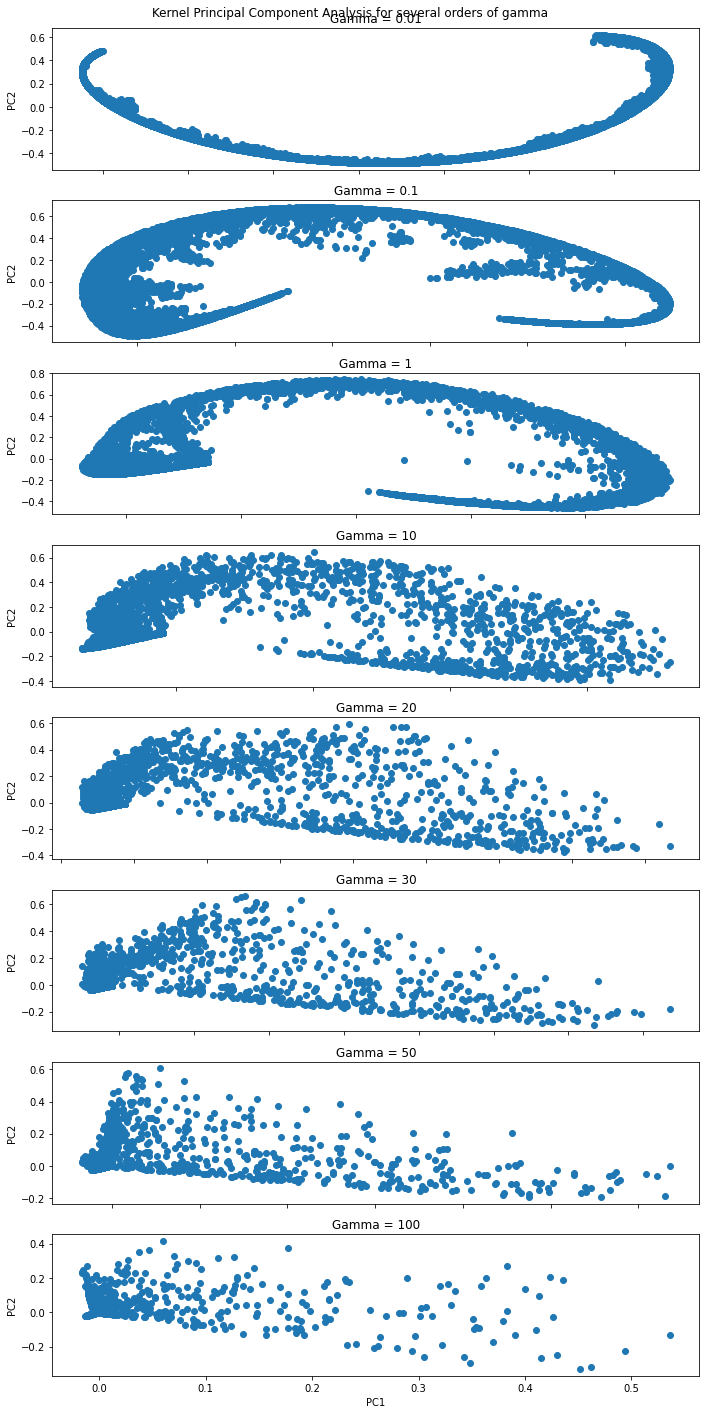

In [ ]:
fig, axs = plt.subplots(8, figsize=(10,20))
fig.suptitle('Kernel Principal Component Analysis for several orders of gamma')
for i in range(len(gamma)):
  # ax[i].
  axs[i].scatter(features2d[i][:,0], features2d[i][:,1])
  axs[i].set_title(f'Gamma = {gamma[i]}')

for ax in axs.flat:
    ax.set(xlabel='PC1', ylabel='PC2')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.tight_layout()

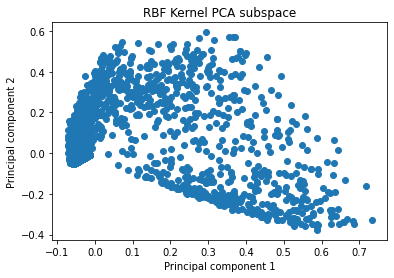

In [ ]:
# From the above subplots, we see that gamma=20 distinguishes the points the most i.e., shows the best cluster separation
# Gamma = 20

plt.scatter(features2d[4][:,0], features2d[4][:,1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('RBF Kernel PCA subspace')
plt.show()

### Clustering the PCA subspace

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

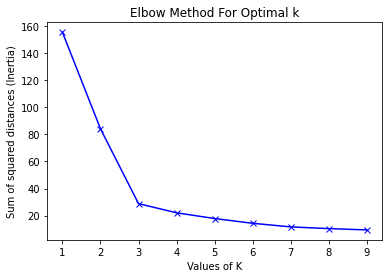

In [ ]:
# find the number of clusters
Sum_of_squared_distances = [] # Sum of squared distances of samples to their closest cluster center
K = range(1,10)
for num_clusters in K:
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features2d[4])
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances (Inertia)') 
plt.title('Elbow Method For Optimal k')
plt.show()

We notice the elbow to be at K = 3, hence, the number of clusters in the kernel subspace = 3, i.e., we find the number of phases over the trajectory to be 3.

In [ ]:
# K-Means clustering = Number of clusters = 3
from sklearn.cluster import DBSCAN, KMeans
km = KMeans(n_clusters=3, init='random', n_init=20, max_iter=500, tol=1e-10, random_state=42)
y_km = km.fit_predict(features2d[4])

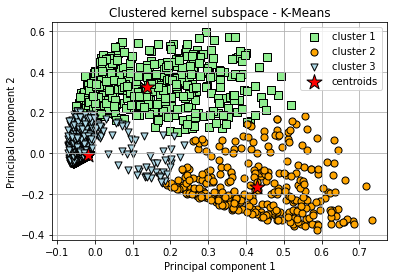

In [ ]:
# plot the 3 clusters
plt.scatter(
    features2d[4][y_km == 0, 0], features2d[4][y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    features2d[4][y_km == 1, 0], features2d[4][y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    features2d[4][y_km == 2, 0], features2d[4][y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Clustered kernel subspace - K-Means')
plt.grid()
plt.show()

In [ ]:
# DBSCAN
db = DBSCAN(eps=0.05, min_samples=10).fit(features2d[4])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 92


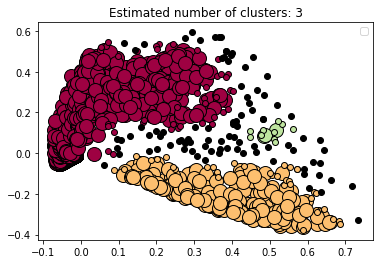

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = features2d[4][class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = features2d[4][class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.legend()
plt.show()

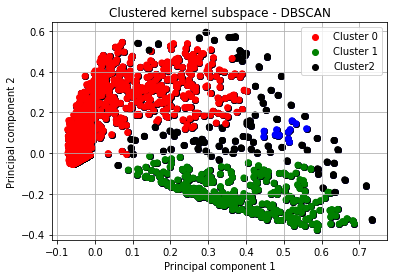

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(features2d[4][:,0], features2d[4][:,1], color ='r')
g = plt.scatter(features2d[4][:,0], features2d[4][:,1], color ='g')
b = plt.scatter(features2d[4][:,0], features2d[4][:,1], color ='b')
k = plt.scatter(features2d[4][:,0], features2d[4][:,1], color='k')
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.scatter(features2d[4][:,0], features2d[4][:,1], c = cvec)
  
# Building the legend
plt.legend((r, g, k), ('Cluster 0', 'Cluster 1', 'Cluster2', 'Noise'))
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Clustered kernel subspace - DBSCAN')
plt.grid()
plt.show()

In [ ]:
!pip install nbconvert
!jupyter nbconvert --to script 'CH5650_Quiz1.ipynb'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook CH5650_Quiz1.ipynb to script
[NbConvertApp] Writing 7444 bytes to CH5650_Quiz1.txt
